In [1]:
# RNN

In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import RNN, Tanh, Softmax, Linear

In [3]:
sin_wave = np.array([math.sin(x) for x in np.arange(200)])

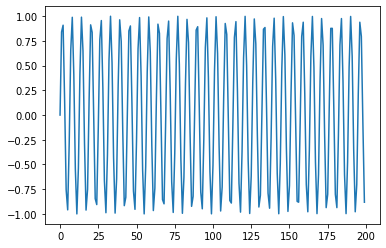

In [4]:
plt.plot(sin_wave)

In [5]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave) - seq_len

for i in range(num_records - 50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(sin_wave[i+seq_len])
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)
Y = np.expand_dims(Y, axis=1)

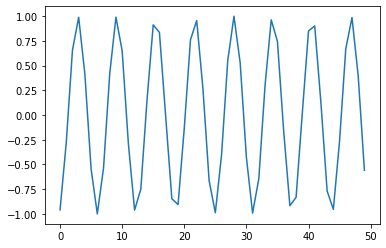

In [6]:
plt.plot(X[5,:,:].reshape(-1))

In [7]:
rnn = RNN(n_input=3, n_hidden=5,n_output=5, layer_a=Tanh,layer_y=Softmax)

In [8]:
xx=X[0,:,:].reshape(1,-1)

In [10]:
rnn.forward(np.random.randn(3,10))

(array([[0.20217561, 0.20213476, 0.20208568, 0.2021072 , 0.20221385,
         0.20209451, 0.20214405, 0.20217937, 0.20207422, 0.20200935],
        [0.20163211, 0.2013972 , 0.20145812, 0.20175538, 0.20165959,
         0.20181364, 0.20150908, 0.201668  , 0.20172442, 0.20164709],
        [0.1973618 , 0.19723144, 0.19724051, 0.19730105, 0.19727089,
         0.19743709, 0.19730287, 0.19727448, 0.19726641, 0.19741267],
        [0.20003567, 0.20023757, 0.20018664, 0.19995467, 0.20004205,
         0.19987485, 0.20013724, 0.20003234, 0.19998242, 0.19999508],
        [0.19879481, 0.19899903, 0.19902905, 0.1988817 , 0.19881361,
         0.19877991, 0.19890676, 0.19884581, 0.19895253, 0.19893582]]),
 array([[-0.03720218,  0.0134569 ,  0.01378704, -0.01941516, -0.01991843,
         -0.05514514, -0.01131731, -0.01723549, -0.00440718, -0.02953348],
        [-0.01964099,  0.03291353,  0.02583517, -0.01861358, -0.00381237,
         -0.05451574,  0.0052251 , -0.00456649, -0.00832773, -0.03125558],
     

In [ ]:
rnn.forward(X[0,:,:])

In [ ]:

X[0,:,:].shape